In [169]:
from importlib import reload
import scModel
reload(scModel)

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import os

In [ ]:
n=20
params = [(v, 0, 0) for v in np.linspace(0,3,n)]
muarr = np.linspace(0,3,n)
x = params
xlabel = r'$\Delta_{s}$'
xticks = [0,6.67,13.333, 20]
labels= [0,1,2,3]
y = muarr
ylabel = r'$\Delta_{A/C}$'

In [171]:
d0, dd, ds=params[10]
mM = scModel.Model(Del0=d0, Del0A=1, Del0C=1, Deld=dd, Dels=ds, mu=0, muB=0, inhomp=False, inhomi=True)
fol = 'NN_dsvsDel0_inhom'
newpath = r"C:\Users\atsch\Desktop\MasterVorlesungen\Sommer25\Lieb-Lattice\Pictures\stats\'"+fol

In [172]:
if not os.path.exists(newpath):
    os.makedirs(newpath)

In [173]:
filename = "infos.txt"

text = os.path.join(newpath, filename)

with open(text, "w") as file:
    file.write(f"x-axis: {xlabel}; y-axis: {ylabel}\nDel0={params[0]}...{params[-1]}\nDel0A={mM.Del0A}\nDel0B={mM.Del0B}\nDel0C={mM.Del0C}\nDeld={mM.DelD}\nDels={mM.DelS}\nmu={mM.mu}\nt={mM.t}\ninhomogeneous potential={mM.inhomp}\ninhomogeneous on-site interaction={mM.inhomi}\n")
    file.close

In [174]:
maxe = np.ones((n, n))
ave = np.ones((n, n))
std = np.ones((n, n))
mingap_mid = np.ones((n, n))
mingap_mid_to_up = np.ones((n, n))
avgap = np.ones((n, n))

#params = np.concatenate()
for i in range(n):
    mu=muarr[i]
    for j in range(n):
        #mM.Del0, mM.DelD, mM.DelS = params_s[j]
        
        d0, dd, ds=params[j]
        mM = scModel.Model(Del0=d0, Del0A=mu, Del0C=mu, Deld=dd, Dels=ds, mu=0, muB=0, inhomp=False, inhomi=True)
        stat = mM.simple_stats()
        
        maxe[i,j] = stat['maxe'][6]
        ave[i,j] = stat['av'][6]
        std[i,j] = stat['std'][6]
        mingap_mid[i,j] = stat['mingap'][2]
        mingap_mid_to_up[i,j] = stat['mingap'][3]
        avgap[i,j] = stat['avgap'][2]

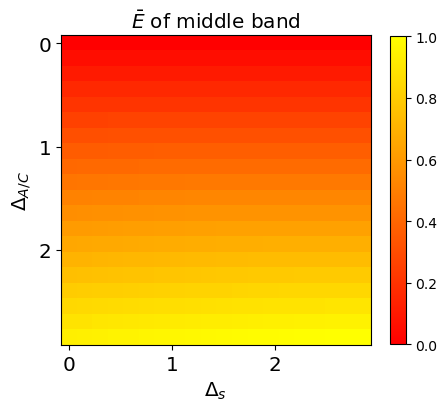

In [175]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))

ax.set_title(r'$\bar{E}$ of middle band', size='x-large')
ax.set_xlabel(xlabel, size='x-large')
ax.set_ylabel(ylabel, size='x-large')
ax.set_xticks(ticks=xticks, labels= labels, size='x-large')
ax.set_yticks(ticks=xticks, labels= labels, size='x-large')


pos = ax.imshow(ave, cmap='autumn') # Visualize the Hamiltonian matrix
fig.colorbar(pos, ax=ax, shrink=0.8)

plt.savefig(newpath+"//av.png")
plt.show()


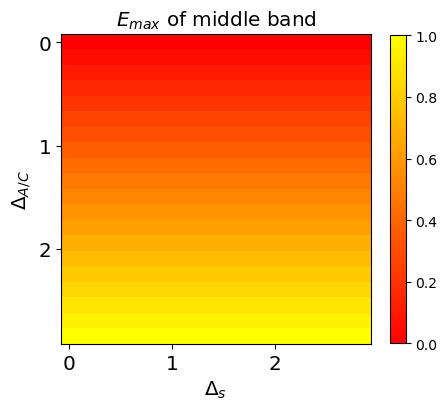

In [176]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))

ax.set_title(r'$E_{max}$ of middle band', size='x-large')
ax.set_xlabel(xlabel, size='x-large')
ax.set_ylabel(ylabel, size='x-large')
ax.set_xticks(ticks=xticks, labels= labels, size='x-large')
ax.set_yticks(ticks=xticks, labels= labels, size='x-large')


pos = ax.imshow(maxe, cmap='autumn') # Visualize the Hamiltonian matrix
fig.colorbar(pos, ax=ax, shrink=0.8)

plt.savefig(newpath+"//maxe.png")
plt.show()


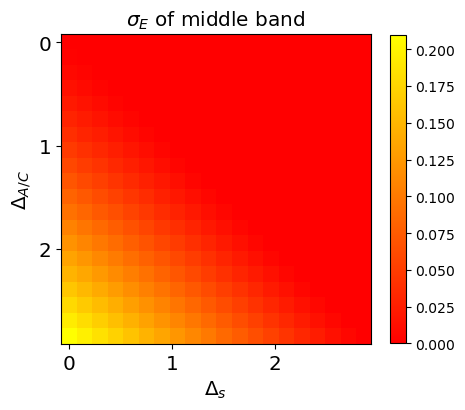

In [177]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))

ax.set_title(r'$\sigma_E$ of middle band', size='x-large')
ax.set_xlabel(xlabel, size='x-large')
ax.set_ylabel(ylabel, size='x-large')
ax.set_xticks(ticks=xticks, labels= labels, size='x-large')
ax.set_yticks(ticks=xticks, labels= labels, size='x-large')


pos = ax.imshow(std, cmap='autumn') 
fig.colorbar(pos, ax=ax, shrink=0.8)

plt.savefig(newpath+"//std.png")
plt.show()


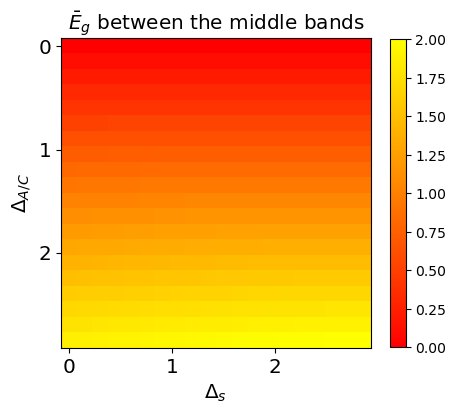

In [178]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))

ax.set_title(r'$\bar{E}_g$ between the middle bands', size='x-large')
ax.set_xlabel(xlabel, size='x-large')
ax.set_ylabel(ylabel, size='x-large')
ax.set_xticks(ticks=xticks, labels= labels, size='x-large')
ax.set_yticks(ticks=xticks, labels= labels, size='x-large')


pos = ax.imshow(avgap, cmap='autumn') 
fig.colorbar(pos, ax=ax, shrink=0.8)

plt.savefig(newpath+"//avgap.png")
plt.show()


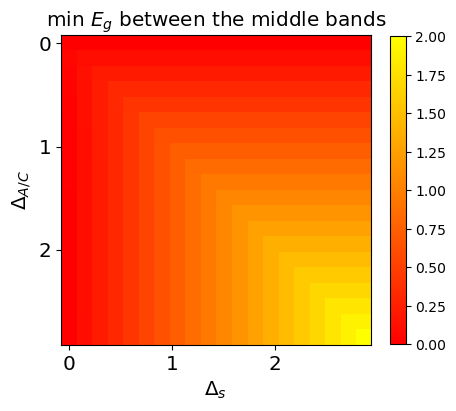

In [179]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))

ax.set_title('min $E_g$ between the middle bands', size='x-large')
ax.set_xlabel(xlabel, size='x-large')
ax.set_ylabel(ylabel, size='x-large')
ax.set_xticks(ticks=xticks, labels= labels, size='x-large')
ax.set_yticks(ticks=xticks, labels= labels, size='x-large')


pos = ax.imshow(mingap_mid, cmap='autumn') 
fig.colorbar(pos, ax=ax, shrink=0.8)

plt.savefig(newpath+"//mingap.png")
plt.show()


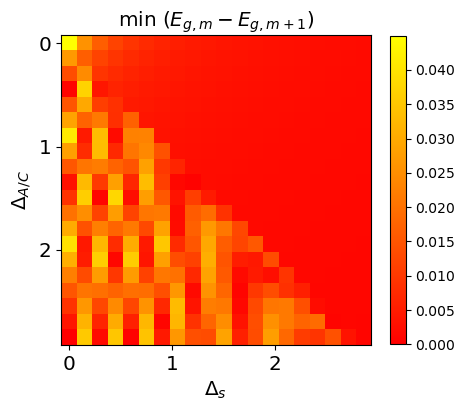

In [180]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))

ax.set_title('min ($E_{g,m}-E_{g,m+1}$)', size='x-large')
ax.set_xlabel(xlabel, size='x-large')
ax.set_ylabel(ylabel, size='x-large')
ax.set_xticks(ticks=xticks, labels= labels, size='x-large')
ax.set_yticks(ticks=xticks, labels= labels, size='x-large')


pos = ax.imshow(mingap_mid_to_up, cmap='autumn') 
fig.colorbar(pos, ax=ax, shrink=0.8)

plt.savefig(newpath+"//maingap_um.png")
plt.show()


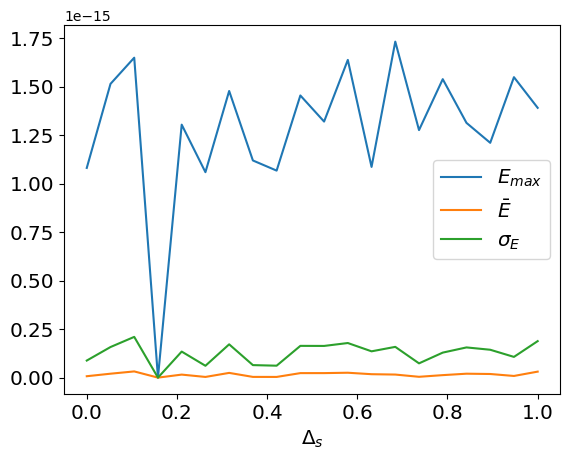

In [181]:
plt.xlabel(xlabel, size='x-large')
#plt.ylabel(ylabel, size='x-large')
plt.xticks(size='x-large')
plt.yticks(size='x-large')

plt.plot(muarr, maxe[0,:], label=r'$E_{max}$')
plt.plot(muarr, ave[0,:], label=r'$\bar{E}$')
plt.plot(muarr, std[0,:], label=r'$\sigma_E$')
#plt.vlines(1.25,0, 2)

plt.legend(fontsize='x-large')
plt.savefig(newpath+"//MiddleBandE.png")
plt.show()

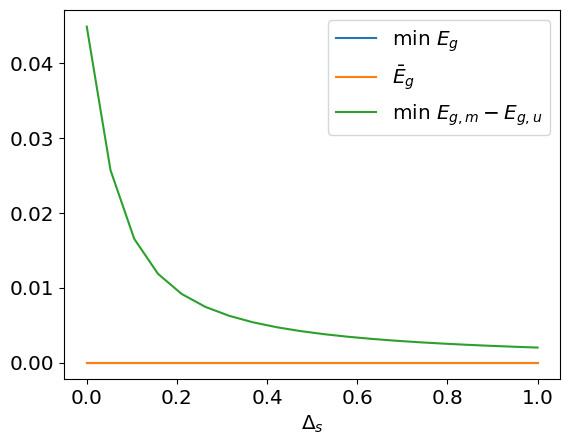

In [182]:
plt.xlabel(xlabel, size='x-large')
#plt.ylabel(ylabel, size='x-large')
plt.xticks(size='x-large')
plt.yticks(size='x-large')

plt.plot(muarr, mingap_mid[0,:], label=r'min $E_g$')
plt.plot(muarr, avgap[0,:], label=r'$\bar{E}_g$')
plt.plot(muarr, mingap_mid_to_up[0,:], label=r'min $E_{g,m}-E_{g,u}$')
#plt.vlines(1.25,0, 2)
plt.legend(fontsize='x-large')
plt.savefig(newpath+"//Gap.png")
plt.show()